<a href="https://colab.research.google.com/github/thedreadpersephone/data-and-python/blob/main/Medical_dataV2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical data project



---



## Define the Problem



---



###Introduction
Cardiovascular disease refers to conditions which affect the heart or blood vessels and is a leading cause of death in the UK, and around the world. As well as the risks to the individual, cardiovascular disease contributes to the financial burden on the NHS and other healthcare systems. Although people may think of cardiovascular disease as affecting those living in developed nations more due to unhealthy diets and sedentary lifestyles, in fact most deaths from cardiovascular disease occur in low to middle income countries. In countries where access to healthcare is more difficult, cardiovascular disease is often detected later when it is too late to effectively reduce the risks.

Several factors are known to increase the risk of cardiovascular disease, including smoking tobacco, drinking alcohol, high blood pressure and being less active.


###Which factors have biggest impact on cardiovascular health?
This project will consider different measurements from this data set to see which may have the biggest impact on cardiovascular health. Knowing more about how to reduce the risks of cardiovascular disease can help governments and healthcare providers to decide which areas to focus on to improve health through public health campaigns and funding for different services to provide the most benefit for health.

## Collect the Data


---

###The data
This data is from a Code Camp project and consists of a set of measurements which may be relevant to cardiovascular health.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/thedreadpersephone/data-and-python/refs/heads/main/medical-data.csv"
medical_data = pd.read_csv(url)
import matplotlib.pyplot as plt

## Clean and Transform


---



###Exploring the data

We have explored the data below. The are no duplicate rows in the dataset. The data types are what we would expect, with the exception of the 'smoke' column, which is float rather than integer.

In [ ]:
def explore_data(df):
  display(df.head())
  display(df.info())
  duplicates = df[df.duplicated()]
  display(duplicates)
explore_data(medical_data)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0.0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0.0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0.0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0.0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0.0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        69997 non-null  float64
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


None

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


###Null values
We can see that the 'smoke' column contains three null values. Since this is a very small number compared to the total data set we can drop these three rows. We now have 69997 rows of data to work with.  


In [ ]:
def drop_nulls(df):
  nulls_df = df[df["smoke"].isnull()]
  display(nulls_df)
  no_nulls = df.dropna()
  display(no_nulls.info())
  return no_nulls
medical_dataV2 = drop_nulls(medical_data)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1368,1921,21769,2,162,74.0,120,80,3,1,NaN,0,1,1
16539,23634,22688,1,164,74.0,150,80,2,1,NaN,0,1,1
69983,99974,19652,1,165,72.0,120,80,1,1,NaN,0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 69997 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   sex          69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  float64
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


None

###Converting columns
 The 'smoke' column should have a value of 0 or 1 to represent smoker and non smoker so we will correct this by converting the column from float to integer.

 The 'age' column gives the age in days which is not very meaningful when considering the age of an adult. We will add a column showing age in whole years. We will save this new version of the dataframe to csv.

In [ ]:
def convert_column(df):
  df['smoke'] = df['smoke'].astype(int).copy()
  display(df.info())
  return df
medical_dataV3 = convert_column(medical_dataV2)

<class 'pandas.core.frame.DataFrame'>
Index: 69997 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   sex          69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  int64  
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


<ipython-input-4-40e65d8fc707>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoke'] = df['smoke'].astype(int).copy()


None

In [ ]:
def convert_age(df):
  df['age in years'] = df['age']// 365
  display(df.head())
  df.to_csv('medical_dataV4.csv')
  return df
medical_dataV4 = convert_age(medical_dataV3)

<ipython-input-5-60ecb38eb10c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age in years'] = df['age']// 365


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


## Analyse


---



###Summary statistics
Below we can view the summary statistics for this data set. For example we can see that the mean height is 164.36cm and the mean weight is 74.2kg. The age in years column ranges from 29 to 64 so we can see that this is a fairly narrow subset of the adult population. According to the information about this dataset, we would expect the sex column to be either 1 for female or 2 for male however we can see that the max is 3. This requires further investigation. The minimum weight of 10kg is also unexpected. The other columns appear to contain values within the expected ranges.

In [ ]:
def summarise_data(df):
  display(df.describe())
summarise_data(medical_dataV4)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
count,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.00000
mean,49972.768319,19468.784348,1.349844,164.359258,74.205727,128.817235,96.631127,1.366844,1.226467,0.088132,0.053774,0.803720,0.499693,52.84045
std,28850.558154,2467.259121,0.477253,8.210297,14.396063,154.014692,188.476538,0.680231,0.572281,0.283489,0.225572,0.397185,0.500003,6.76679
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.00000
25%,25008.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.00000
50%,50002.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.00000
75%,74889.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.00000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.00000


###Values in sex column
Below we can see that there are 11 occurrences of 3 in the 'sex' column. The dataset information is not clear on what this represents. It may be an error, missing information or people who do not identify as male or female. Since we are unsure what this represents, we will retain these rows in the dataset in case there is anything interesting about to be found.

In [ ]:
def explore_columns(df):
  column_value_counts = df['sex'].value_counts(ascending=True)
  print(column_value_counts)
explore_columns(medical_dataV4)

sex
3       11
2    24466
1    45520
Name: count, dtype: int64


###Pie chart of sex proportion
The pie chart below shows that 65% of the data set are female, only 35% male and a very small number of the third unknown value from the sex column.

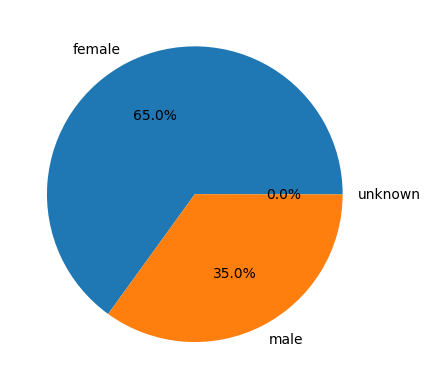

In [ ]:
def create_pie(df):
  data = df.groupby("sex")["id"].count()
  labels = 'female', 'male', 'unknown'
  plt.pie(data, labels=labels, autopct='%1.1f%%')
  plt.show()
create_pie(medical_dataV4)

###Histogram of age distribution
This histogram shows the distribution of ages across the dataset. We can see that the data are skewed towards the higher age ranges, particularly between 50 and 60.

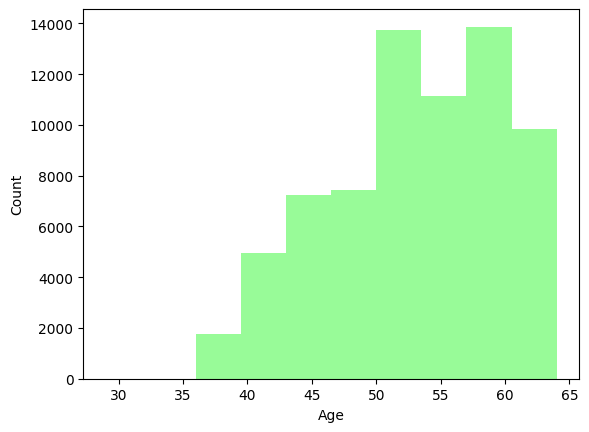

In [ ]:
import matplotlib.pyplot as plt
def create_histogram(df):
  col_to_keep = ["age in years"]
  age = df[col_to_keep]
  plt.hist(age, color='palegreen')
  plt.xlabel("Age")
  plt.ylabel("Count")
  plt.show()
create_histogram(medical_dataV4)

###Age and Weight
The scatter graph below shows that as age increases, average weight also increases. The r value of 0.7 suggests a fairly strong positive correlation and p value suggests this is a significant result. However we can also see an outlier at age 30 where the average weight is very low, which likely reflects the very low minimum weight of 10kg mentioned previously and the fact that there is very little data for people under 35 in the dataset.

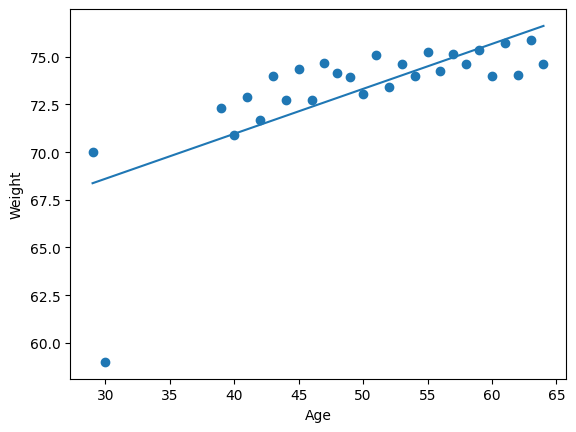

LinregressResult(slope=0.2356644187618971, intercept=61.53641729148232, rvalue=0.7034044597320582, pvalue=2.976212574255184e-05, stderr=0.046702854244478315, intercept_stderr=2.3709297617040535)


In [ ]:
from scipy.stats import linregress
def create_scatter(df):
  age = df.groupby('age in years')['weight'].mean()
  labels = age.keys()
  plt.scatter(labels, age)
  plt.xlabel("Age")
  plt.ylabel("Weight")
  regression = linregress(labels,age)
  slope=regression.slope
  intercept=regression.intercept
  plt.plot(labels, slope*labels + intercept)
  plt.show()
  print(regression)
create_scatter(medical_dataV4)

## Interpret and Visualise


---



<img src="https://drive.google.com/uc?id=1ljh49CJ5vl4XHOhsW--r_D2cZUGU7zev">

<img src="https://drive.google.com/uc?id=1dNEB9aWJtsaRqkqvQNtEdhlS6NIOJxVi">


<img src="https://drive.google.com/uc?id=16GClFMxGV87qbKpa4dnxrxiWj5hqsWVO">


<img src="https://drive.google.com/uc?id=1YcFUJ75FUrsV_0Th_YleKoEI6VgimQow">


<img src="https://drive.google.com/uc?id=1VDFiBl7NDMwRXTamxt6clrs5OZjj-mRk">

## Tell the Story



---



###Key findings
In this dataset we have found that high cholesterol seems to be associated with poor cardiovascular health. This suggests that treating high cholesterol and advising on lifestyle changes might be beneficial for improving cardiovascular health. We have also found that increasing age is associated with increased numbers of people with poor cardiovascular health, with a particular increase around age 55. Although growing older is not something which can be prevented, this data could be used to support targeted screening or healthcare advice at the 50 to 55 age group. Smoking and activity level did not have a clear impact on cardiovascular health. The poor cardiovascular health group appeared to be less active, however we do not know if inactivity contributed to poor cardiovascular health or if people with poor cardiovascular health prevents people from being active.

###Limitations of the data
It is difficult to draw any firm conclusions from this data as it does not reflect the general population. There are many more women than men in the data set and the age range is limited. There are also only a small number of smokers in the data set, so it not possible to say with any certainty whether smoking has any impact on cardiovascular health based on this data.

###Next steps
A possibility for further investigation would be to collect more data specifically from people who have high cholesterol but do not have poor cardiovascular health to find out if there are any mitigating factors.

## Evaluate the Process


---



###Clean and transform
This went well, I felt fairly confident about what I was doing. I was pleased that I recognised the data type of the smoke column as being incorrect before it caused any problems with analysis. However I was unsure if I should be reshaping the data - the number of columns that were 0/1 values made me think I should be doing something different with them.
###Analyse
Again, this went well up to the point where I wanted to make bivariate graphs. As there were so many columns with 0/1 values I wasn't sure of the best way to visualise these in Python. It seems there is more I can do with this data in Power BI. There was an issue with the version of matplotlib that didn't allow me to label the axes of my charts. By printing the data type of plt.xlabel I was able to see that this was being treated as a string. To resolve this I had to use a different version of the template and copy my work over. On making the chart using weight values, I realised the minimum weight is very low and may be an error. I should probably have cleaned this in a previous step.
###Interpret and visualise
This step was challenging. As the data contained such unequal numbers in different groups - smokers and non smokers, male and female, for example, it would make more sense to show the data as proportions rather than just numbers. However I wasn't able to understand how to do this. Also it wasn't entirely clear from the data source what 0 or 1 actually meant. I was able to create new columns using dax formulas to rename values to be more meaningful though, which was a step forward.